In [1]:
import pandas as pd
import time
import json
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
key_file = '../keys.json'
with open(key_file) as f:
    keys = json.load(f)
    

client_credentials_manager = SpotifyClientCredentials(client_id=keys['spotify_client_id'],
                                                      client_secret=keys['spotify_client_secret'])
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [254]:
songs_file = 'data/songs/songs_2019-3-17_12-31-9.txt'
songs = pd.read_csv(songs_file)
songs

## Clean Lyrics

In [474]:
import re 

lyrics = pd.read_csv('data/lyrics_with_lang.txt')
print(len(lyrics))
# lyrics = lyrics[lyrics['lang'] == 'en']
lyrics['lyrics'] = lyrics['lyrics'].str.lower()

reg = "[\(\[].*?[\)\]]"
lyrics['lyrics'] = lyrics['lyrics'].str.replace(reg, '')
lyrics['lyrics'] = lyrics['lyrics'].str.replace("\\r\\n", ' ')

punct_reg = '[^\w\s]'
lyrics['lyrics'] = lyrics['lyrics'].str.replace(punct_reg, ' ')
lyrics


24331


,location,artist,title,lyrics,lang,song_id
0,Mexico City MX,Grupo Polo Montañes,Un Sueño Y Nada Mas,a veces tengo ganas de volver a verte y sé que...,es,2bVisOYbfWI29XxWEdTKSX
1,Mexico City MX,Los Estramboticos,La Herida,fue esta soledad y no el destino quien nos pus...,es,0vQfzyjQFHQ208JCNjcE5H
2,Mexico City MX,La Castañeda,Cenit,creí cuando dijeron que la luna se dormía cuan...,es,6hLo5Dg74PGHjSbcP6tNOr
3,Mexico City MX,Maskatesta,Tu Que Pediras,tee diiree una vez mass lo quee pido por tii ...,es,284Ztj2XGMvoWKILVJGasd
4,Mexico City MX,DLD,Por Siempre,hoy he vuelto a ser quien soy la vida me regal...,es,6FLSb8CJwrcfXfzfD4ySji
5,Mexico City MX,Los De Abajo,Skapate,uhh mami con este ritmo va que me sabe a choco...,es,0mGNPivC5BpTowR3NF45bD
6,Mexico City MX,Los Caligaris,Kilómetros,cada vez que pienso y me doy cuenta donde esto...,es,4Jr2cHZaIe1rmdVlc5efIy
7,Mexico City MX,Maria Daniela Y Su Sonido Lasser,Pobre Estúpida,y ella de qué va siempre está mirando atrás ...,es,0Vu0aOYDeVPLe4dcVrvRvx
8,Mexico City MX,La Gusana Ciega,"Yes Sir, I Can Boogie",oye estas perdiendo mucho tiempo no dudes ta...,es,5IwpFZxC7TlYBwVpXqks8n
9,Mexico City MX,Liquits,Desde Que,te senti venir como en una vision ya estas a...,es,4QLfVqOrpBOJra53EhlEX0


In [475]:
merged = songs.merge(right=lyrics[['song_id', 'lyrics', 'lang']], how='inner', on='song_id')
merged['country'] = merged.location.str[-2:]
merged

,location,playlist_id,artist,title,song_id,lyrics,lang,country
0,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
1,Ecatepec de Morelos MX,4Y16UsqYEHnmUloa740kLA,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
2,Pachuca MX,20kOAnUS93mEeF0XBciOIW,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
3,Naucalpan MX,319wrRLXJp5Hgmj8aYhXdO,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
4,Cuautitlán Izcalli MX,4DZAocn0US6PbB18DGabae,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
5,Ciudad Lopez Mateos MX,1W5YQsuAUGdR0JV1fjpu22,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
6,Tlalnepantla MX,1GiZ8sNPcMOx3eOYPjEW2r,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
7,Ciudad Nezahualcoyotl MX,5E20rsCUuC2ISNb7wSdFGx,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
8,Ixtapaluca MX,459yis95owl66w1xXwFlx7,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX
9,Chalco MX,6HV08aWNimqd6ABFS69POz,Grupo Polo Montañes,Un Sueño Y Nada Mas,2bVisOYbfWI29XxWEdTKSX,a veces tengo ganas de volver a verte y sé que...,es,MX


In [46]:
merged[merged['location'] == 'Aabenraa DK']

,location,playlist_id,artist,title,song_id,lyrics,lang
26327,Aabenraa DK,6u7jfhRUNy54RbaGbfBotm,Isam B,Deep In The Shadows,n0MoLAa7M8tFsLW1sIsYD,shorter days and longer nights naked trees an...,en
26932,Aabenraa DK,6u7jfhRUNy54RbaGbfBotm,Reem,Kill the Love,bHpZxyXnvkHeItfOxEJ6o,get that fight back get that grind it mind my...,en
27006,Aabenraa DK,6u7jfhRUNy54RbaGbfBotm,Nicklas Sahl,Planets,VglI9HaCwWBOIjQdbDQ0D,on a train out of town driving over swinging ...,en
31270,Aabenraa DK,6u7jfhRUNy54RbaGbfBotm,Niklas,Promise You,QSzXcCtTmRJ6VwK6LgO3M,"i promise you that i'll treat you right yeah,...",en
31666,Aabenraa DK,6u7jfhRUNy54RbaGbfBotm,Scarlet Pleasure,What A Life,0G0YTBb4gtAgb0ODAPNAn,"what a life, what a night what a beautiful, b...",en
41067,Aabenraa DK,6u7jfhRUNy54RbaGbfBotm,Sko/Torp,On A Long Lonely Night,Pjt5EH19qUerS1xfw6aNC,i've been wondering where you where you've gon...,en


In [476]:
grouped = merged.groupby('location')['song_id'].count()
grouped.sort_values(ascending=False)[:100]

location
San Fernando PH                      112
Santa Cruz BO                         94
Edmond Oklahoma US                    88
Roanoke Virginia US                   85
Sunnyside New York US                 84
Dubuque Iowa US                       84
Stockton-on-Tees GB                   83
Euless Texas US                       82
Barnsley GB                           82
Columbus Georgia US                   82
Fort Myers Florida US                 82
Parkville Victoria AU                 81
Elyria Ohio US                        81
York GB                               81
Warrington GB                         81
Le Bourget FR                         81
Brandon Mississippi US                80
Springfield Missouri US               80
Mandurah Western Australia AU         80
Lubbock Texas US                      80
Spokane Washington US                 80
Hellemmes-Lille FR                    80
Albert Park Victoria AU               80
Mooloolabah Queensland AU             79
Middles

In [477]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

s_w = set(stopwords.words('english'))
s_w.update(['got', 'oh'])

word_counts = pd.Series(" ".join(merged[merged['location'] == 'Edmond Oklahoma US']['lyrics']).split()).value_counts()
word_counts.drop(labels=s_w, inplace=True, errors='ignore')
edmond = word_counts[:50]

word_counts = pd.Series(" ".join(merged[merged['location'] == 'York GB']['lyrics']).split()).value_counts()
word_counts.drop(labels=s_w, inplace=True, errors='ignore')
york = word_counts[:50]

word_counts = pd.Series(" ".join(merged[merged['country'] == 'AU']['lyrics']).split()).value_counts()
word_counts.drop(labels=s_w, inplace=True, errors='ignore')
au = word_counts[:50]

In [478]:
print(york)
print(edmond)

like         209
know         203
la           192
love         180
go           137
never        119
let          119
get          110
cause        109
want          93
time          88
even          87
back          85
good          79
one           78
come          77
gonna         71
right         69
girl          67
take          65
think         64
wanna         63
could         61
see           61
heart         61
dead          59
hear          59
nothing       58
day           57
way           55
better        53
yeah          53
need          52
baby          52
make          51
say           51
lean          51
really        51
away          49
night         49
bop           48
feel          46
light         45
would         43
look          43
well          42
beat          39
everybody     39
sit           37
ooh           37
dtype: int64
love          179
like          147
know          110
one            98
jesus          95
yeah           83
cause          80
still      

In [470]:
york.to_csv('../data/york_GB_tokens_top50.txt', header=False)

In [472]:
edmond.to_csv('../data/analyses/analysis_2019-03-17/edmond_oklahoma_US_tokens_top50.txt', header=False)

In [480]:
au.to_csv('../data/analyses/analysis_2019-03-17/AU_space_tokens_top50.txt', header=False)

In [479]:
print(au)

know      18250
like      16340
love      13443
never     12866
go        12421
get       11351
way       10125
feel       9705
yeah       9520
cause      9457
could      8901
see        8070
let        7875
time       7815
ever       7810
better     7614
gonna      7597
one        7420
right      7231
would      6825
wanna      6539
back       6399
away       6296
want       6195
need       6015
make       5904
baby       5656
take       5616
say        5497
hair       5426
good       5380
think      5291
little     5257
day        5159
cut        4929
tell       4890
home       4845
come       4748
give       4740
things     4661
us         4382
well       4348
night      4308
ooh        4255
life       4050
much       4044
face       3934
drink      3834
always     3820
around     3763
dtype: int64


### Get Audio Features

In [2]:
# def get_audio_features(row):
lyrics = pd.read_csv('data/lyrics_with_lang.txt')
i = 0
chunk = 50
pbar = tqdm_notebook(total=len(lyrics))

while i < len(lyrics):
    if (len(lyrics) - i) < 50:
        chunk = len(lyrics)-i+1
    lyrics.loc[i:i+chunk, 'audio_features'] = spotify.audio_features(lyrics.loc[i:i+chunk, 'song_id'])
    i += 50
    pbar.update(50)
pbar.close()

lyrics

,location,artist,title,lyrics,lang,song_id,audio_features
0,Mexico City MX,Grupo Polo Montañes,Un Sueño Y Nada Mas,A veces tengo ganas de volver a verte\r\nY sé ...,es,2bVisOYbfWI29XxWEdTKSX,"{'danceability': 0.607, 'energy': 0.542, 'key'..."
1,Mexico City MX,Los Estramboticos,La Herida,Fue esta soledad y no el destino\r\nQuien nos ...,es,0vQfzyjQFHQ208JCNjcE5H,"{'danceability': 0.751, 'energy': 0.806, 'key'..."
2,Mexico City MX,La Castañeda,Cenit,Creí cuando dijeron que la luna se dormía cuan...,es,6hLo5Dg74PGHjSbcP6tNOr,"{'danceability': 0.629, 'energy': 0.325, 'key'..."
3,Mexico City MX,Maskatesta,Tu Que Pediras,"Tee diiree una vez mass, lo quee pido por tii\...",es,284Ztj2XGMvoWKILVJGasd,"{'danceability': 0.623, 'energy': 0.79, 'key':..."
4,Mexico City MX,DLD,Por Siempre,Hoy he vuelto a ser quien soy\r\nla vida me re...,es,6FLSb8CJwrcfXfzfD4ySji,"{'danceability': 0.452, 'energy': 0.891, 'key'..."
5,Mexico City MX,Los De Abajo,Skapate,Uhh mami\r\nCon este ritmo va que me sabe a ch...,es,0mGNPivC5BpTowR3NF45bD,"{'danceability': 0.685, 'energy': 0.827, 'key'..."
6,Mexico City MX,Los Caligaris,Kilómetros,Cada vez que pienso y me doy cuenta donde esto...,es,4Jr2cHZaIe1rmdVlc5efIy,"{'danceability': 0.564, 'energy': 0.966, 'key'..."
7,Mexico City MX,Maria Daniela Y Su Sonido Lasser,Pobre Estúpida,"Y ella de qué va, siempre está mirando atrás.\...",es,0Vu0aOYDeVPLe4dcVrvRvx,"{'danceability': 0.881, 'energy': 0.978, 'key'..."
8,Mexico City MX,La Gusana Ciega,"Yes Sir, I Can Boogie",Oye \r\nEstas perdiendo mucho tiempo \r\nNo du...,es,5IwpFZxC7TlYBwVpXqks8n,"{'danceability': 0.79, 'energy': 0.531, 'key':..."
9,Mexico City MX,Liquits,Desde Que,"Te senti venir como en una vision, \r\nYa esta...",es,4QLfVqOrpBOJra53EhlEX0,"{'danceability': 0.713, 'energy': 0.71, 'key':..."


In [3]:
lyrics.drop(columns=['location'], inplace=True)
cols = ['song_id', 'artist', 'title', 'lyrics', 'lang', 'audio_features']
lyrics = lyrics[cols]
lyrics


,song_id,artist,title,lyrics,lang,audio_features
0,2bVisOYbfWI29XxWEdTKSX,Grupo Polo Montañes,Un Sueño Y Nada Mas,A veces tengo ganas de volver a verte\r\nY sé ...,es,"{'danceability': 0.607, 'energy': 0.542, 'key'..."
1,0vQfzyjQFHQ208JCNjcE5H,Los Estramboticos,La Herida,Fue esta soledad y no el destino\r\nQuien nos ...,es,"{'danceability': 0.751, 'energy': 0.806, 'key'..."
2,6hLo5Dg74PGHjSbcP6tNOr,La Castañeda,Cenit,Creí cuando dijeron que la luna se dormía cuan...,es,"{'danceability': 0.629, 'energy': 0.325, 'key'..."
3,284Ztj2XGMvoWKILVJGasd,Maskatesta,Tu Que Pediras,"Tee diiree una vez mass, lo quee pido por tii\...",es,"{'danceability': 0.623, 'energy': 0.79, 'key':..."
4,6FLSb8CJwrcfXfzfD4ySji,DLD,Por Siempre,Hoy he vuelto a ser quien soy\r\nla vida me re...,es,"{'danceability': 0.452, 'energy': 0.891, 'key'..."
5,0mGNPivC5BpTowR3NF45bD,Los De Abajo,Skapate,Uhh mami\r\nCon este ritmo va que me sabe a ch...,es,"{'danceability': 0.685, 'energy': 0.827, 'key'..."
6,4Jr2cHZaIe1rmdVlc5efIy,Los Caligaris,Kilómetros,Cada vez que pienso y me doy cuenta donde esto...,es,"{'danceability': 0.564, 'energy': 0.966, 'key'..."
7,0Vu0aOYDeVPLe4dcVrvRvx,Maria Daniela Y Su Sonido Lasser,Pobre Estúpida,"Y ella de qué va, siempre está mirando atrás.\...",es,"{'danceability': 0.881, 'energy': 0.978, 'key'..."
8,5IwpFZxC7TlYBwVpXqks8n,La Gusana Ciega,"Yes Sir, I Can Boogie",Oye \r\nEstas perdiendo mucho tiempo \r\nNo du...,es,"{'danceability': 0.79, 'energy': 0.531, 'key':..."
9,4QLfVqOrpBOJra53EhlEX0,Liquits,Desde Que,"Te senti venir como en una vision, \r\nYa esta...",es,"{'danceability': 0.713, 'energy': 0.71, 'key':..."


In [4]:
lyrics.to_csv(path_or_buf='./data/song_info.txt', index=False, encoding='utf-8')

In [283]:
lyrics.iloc[0]['audio_features']

dict

In [311]:
import ast
song_info = pd.read_csv('./data/song_info.txt')
# print(type(ast.literal_eval(song_info.iloc[0]['audio_features'])))

song_info['musical_valence'] = song_info.audio_features.map(lambda x: ast.literal_eval(x)['valence'])

song_info.head()


<class 'dict'>


,song_id,artist,title,lyrics,lang,audio_features,musical_valence
0,2bVisOYbfWI29XxWEdTKSX,Grupo Polo Montañes,Un Sueño Y Nada Mas,A veces tengo ganas de volver a verte\r\nY sé ...,es,"{'danceability': 0.607, 'energy': 0.542, 'key'...",0.808
1,0vQfzyjQFHQ208JCNjcE5H,Los Estramboticos,La Herida,Fue esta soledad y no el destino\r\nQuien nos ...,es,"{'danceability': 0.751, 'energy': 0.806, 'key'...",0.764
2,6hLo5Dg74PGHjSbcP6tNOr,La Castañeda,Cenit,Creí cuando dijeron que la luna se dormía cuan...,es,"{'danceability': 0.629, 'energy': 0.325, 'key'...",0.447
3,284Ztj2XGMvoWKILVJGasd,Maskatesta,Tu Que Pediras,"Tee diiree una vez mass, lo quee pido por tii\...",es,"{'danceability': 0.623, 'energy': 0.79, 'key':...",0.630
4,6FLSb8CJwrcfXfzfD4ySji,DLD,Por Siempre,Hoy he vuelto a ser quien soy\r\nla vida me re...,es,"{'danceability': 0.452, 'energy': 0.891, 'key'...",0.293


In [331]:
old_min = 0
old_max = 1
old_range = 1
new_range = 2
new_min = -1

song_info['musical_valence_scaled'] = (((song_info['musical_valence'] - old_min) * new_range) / old_range) + new_min

song_info.sort_values(by='musical_valence_scaled', inplace=True)

song_info


,song_id,artist,title,lyrics,lang,audio_features,musical_valence,lyrical_valence,musical_valence_scaled
9860,1OrhwZaLMoymvyxSgKNBLk,Hippo Campus,Mistakes,i know you see the light upon my face a warnin...,en,"{'danceability': 0.0877, 'energy': 0.222, 'key...",0.0331,-0.8338,-0.9338
5446,2Y8PuA6sur53dcZh39aYrs,Hybrid Minds,Brighter Days,slow down take a breathe you dont need to feel...,en,"{'danceability': 0.504, 'energy': 0.649, 'key'...",0.0334,0.9300,-0.9332
8213,0fyHfv7X0MRv6B2EfwmW5G,Russ,Someone to Drink With,i just need someone to drink with someone t...,en,"{'danceability': 0.711, 'energy': 0.5, 'key': ...",0.0361,0.9861,-0.9278
9381,2jtlU6H5C9WFB0x72f6YGo,Hybrid Minds,Touch,open my mouth to breathe the words to you but ...,en,"{'danceability': 0.582, 'energy': 0.821, 'key'...",0.0373,-0.9378,-0.9254
7936,6qcuRcbz8DCLG6nG4or8Uo,Russ,Cherry Hill,you know what id do for you i know what youd d...,en,"{'danceability': 0.681, 'energy': 0.469, 'key'...",0.0373,-0.9961,-0.9254
9329,2i6KDTQPyVkkT2xfq784dv,Ro James,A.D.I.D.A.S. (All Day I),i see your face when i close my eyes when your...,en,"{'danceability': 0.412, 'energy': 0.384, 'key'...",0.0373,0.9844,-0.9254
15786,55SBnUF28p7VolE0P2PiYb,Phora,Fake Smiles,its like the more i try the less i feel in de...,en,"{'danceability': 0.461, 'energy': 0.612, 'key'...",0.0374,-0.9936,-0.9252
1112,1YR5cWluRLRsdeqNA5AHow,New Creation Worship,Wonderful (Grace Made Real),heaven come into this moment only in your pre...,en,"{'danceability': 0.384, 'energy': 0.352, 'key'...",0.0376,0.9973,-0.9248
9141,2gE30KMigk24i82w7KLAIm,Bethel Music,It Is Well,grander earth has quaked before moved by the s...,en,"{'danceability': 0.395, 'energy': 0.445, 'key'...",0.0377,0.9423,-0.9246
18158,6SxCmFXCfDM5kdYTR1QZSo,Hybrid Minds,Pretend,it took four long years to see you three whole...,en,"{'danceability': 0.547, 'energy': 0.914, 'key'...",0.0379,0.9739,-0.9242


In [312]:
import re 

song_info = song_info[song_info['lang'] == 'en']
song_info['lyrics'] = song_info['lyrics'].str.lower()

reg = "[\(\[].*?[\)\]]"
song_info['lyrics'] = song_info['lyrics'].str.replace(reg, '')
song_info['lyrics'] = song_info['lyrics'].str.replace("\\r\\n", ' ')

punct_reg = '[^\w\s]'
song_info['lyrics'] = song_info['lyrics'].str.replace(punct_reg, '')
song_info


,song_id,artist,title,lyrics,lang,audio_features,musical_valence
36,6cbqh8woSu03Vj8s1PCK9C,Macka B,Step Up,uh here we go thats right uh huh uh huh uh huh...,en,"{'danceability': 0.895, 'energy': 0.752, 'key'...",0.773
83,3xIHePHJbOEtnzlwAOoCtz,Leschea,Fulton St.,he be rollin in his jeep cruisin down on fulto...,en,"{'danceability': 0.736, 'energy': 0.51, 'key':...",0.572
119,3zb1zBmkrPF6VW8RhlSYA1,Suga Free,Why U Bullshittin'?,so pay attention babe pay attention our father...,en,"{'danceability': 0.839, 'energy': 0.706, 'key'...",0.714
120,6A8KuRrV72ZP4MneZRCsSm,03 Greedo,Rude,i dont mean to be rude i dont mean to be out ...,en,"{'danceability': 0.585, 'energy': 0.65, 'key':...",0.733
121,7hphy8rtxpYshs3UzDZTzN,Brenton Wood,Baby You Got It,i run after you like a fool would do but mama ...,en,"{'danceability': 0.787, 'energy': 0.708, 'key'...",0.962
122,23UfvHTeL1PP8fQSeHbxXG,Ralfi Pagan,Make It with You,hey have you ever tried really reaching out fo...,en,"{'danceability': 0.613, 'energy': 0.31, 'key':...",0.525
123,1N7qu71GFoEzp7KK10Y7m3,DJ Quik,Pitch In OnA Party,momma i know you said that you wanted a recor...,en,"{'danceability': 0.927, 'energy': 0.558, 'key'...",0.530
124,6xJEOq9DAWkPYvLzY7eIk5,Smokey Robinson,The Agony And The Ecstasy,whats it all about this crazy love how did our...,en,"{'danceability': 0.5, 'energy': 0.351, 'key': ...",0.417
125,2lRD5UGnUCaon5g5cHbkCC,The Temprees,Love...Can Be So Wonderful,baby love ooh our love our love ooh baby love ...,en,"{'danceability': 0.679, 'energy': 0.267, 'key'...",0.599
126,03DQO1cC5RzTWRxJLzJCgy,The Fuzz,I Love You for All Seasons,i love you for so many reasons which means i l...,en,"{'danceability': 0.477, 'energy': 0.464, 'key'...",0.689


In [313]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def lyric_sentiment(lyric):
    score = analyser.polarity_scores(lyric)
    return score['compound']
    

song_info['lyrical_valence'] = song_info['lyrics'].progress_apply(lambda x: lyric_sentiment(x))
song_info.head()

,song_id,artist,title,lyrics,lang,audio_features,musical_valence,lyrical_valence
36,6cbqh8woSu03Vj8s1PCK9C,Macka B,Step Up,uh here we go thats right uh huh uh huh uh huh...,en,"{'danceability': 0.895, 'energy': 0.752, 'key'...",0.773,0.9095
83,3xIHePHJbOEtnzlwAOoCtz,Leschea,Fulton St.,he be rollin in his jeep cruisin down on fulto...,en,"{'danceability': 0.736, 'energy': 0.51, 'key':...",0.572,0.8571
119,3zb1zBmkrPF6VW8RhlSYA1,Suga Free,Why U Bullshittin'?,so pay attention babe pay attention our father...,en,"{'danceability': 0.839, 'energy': 0.706, 'key'...",0.714,-0.9962
120,6A8KuRrV72ZP4MneZRCsSm,03 Greedo,Rude,i dont mean to be rude i dont mean to be out ...,en,"{'danceability': 0.585, 'energy': 0.65, 'key':...",0.733,-0.9903
121,7hphy8rtxpYshs3UzDZTzN,Brenton Wood,Baby You Got It,i run after you like a fool would do but mama ...,en,"{'danceability': 0.787, 'energy': 0.708, 'key'...",0.962,0.9961


In [314]:
songs = pd.read_csv('./data/songs/songs_2019-3-17_12-31-9.txt')
merged = songs.merge(right=song_info[['song_id', 'lyrics', 'lang', 'musical_valence', 'lyrical_valence']], how='inner', on='song_id')
merged['country'] = merged.location.str[-2:]



,location,playlist_id,artist,title,song_id,lyrics,lang,musical_valence,lyrical_valence,country
0,São Paulo BR,6QOjOvLDWKVNCW9H1J9vCY,Leschea,Fulton St.,3xIHePHJbOEtnzlwAOoCtz,he be rollin in his jeep cruisin down on fulto...,en,0.5720,0.8571,BR
1,Osasco BR,1rfYB95mbIDLnWOJCVr1AP,Leschea,Fulton St.,3xIHePHJbOEtnzlwAOoCtz,he be rollin in his jeep cruisin down on fulto...,en,0.5720,0.8571,BR
2,Los Angeles California US,53JqQphsAHvDGGVZErKmW5,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
3,Las Vegas Nevada US,16olvYpf0K5nWJ98Oxa4TG,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
4,Corona California US,1lgTx3EbMGfQZ38U3EUjCk,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
5,San Diego California US,2fZYvfo7EowvA9B8SQZb6M,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
6,North Hollywood California US,45tRRz1aIGDxboHgnKEOES,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
7,Covina California US,4roaYiIaHIcKKqSBtfSTKq,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
8,Long Beach California US,1tRf23mdy7WwMhKRG2BHln,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US
9,Bakersfield California US,4yAdCZuEBd97qGqIkveY3x,Suga Free,Why U Bullshittin'?,3zb1zBmkrPF6VW8RhlSYA1,so pay attention babe pay attention our father...,en,0.7140,-0.9962,US


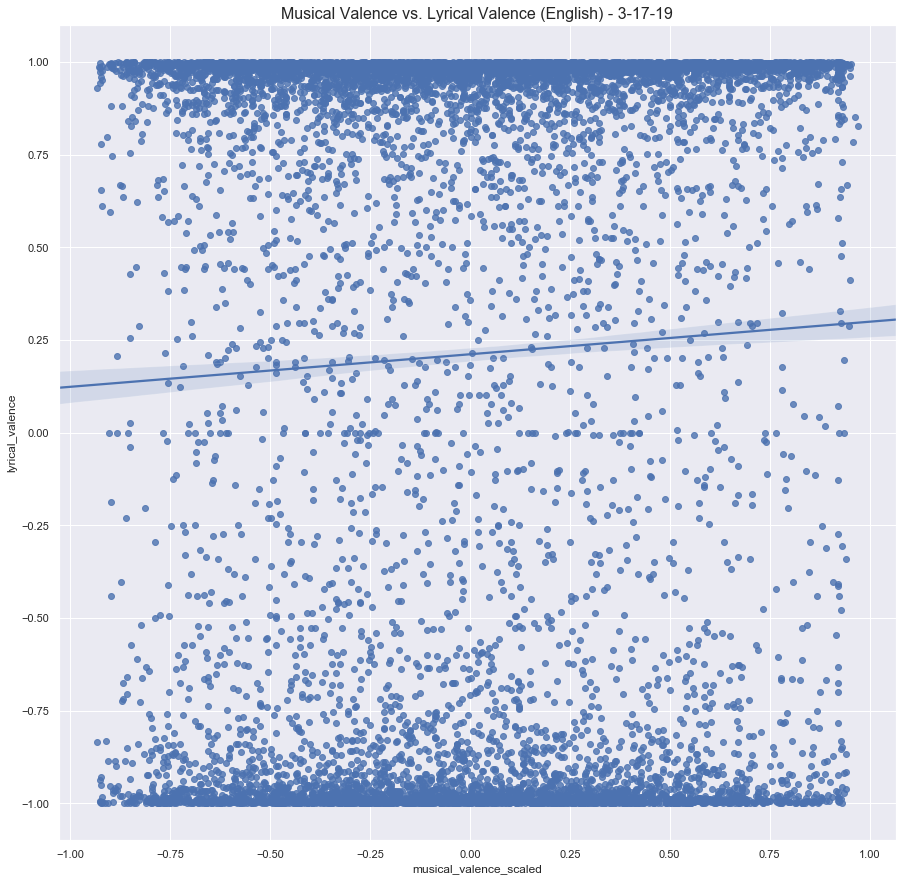

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(15, 15))

song_info = song_info[(song_info['lyrics'] != '') 
                      & (song_info['lyrics'] != 'this music does not contain words')
                      & (song_info['lyrics'] != 'instrumental')].copy()

ax = sns.regplot(data=song_info, x='musical_valence_scaled', y='lyrical_valence')
ax.set_title('Musical Valence vs. Lyrical Valence (English) - 3-17-19', fontsize=16)
plt.show()

In [459]:
merged['country'].value_counts()
g = merged.groupby('country')

g = g.filter(lambda x: len(x) >= 100)

In [460]:
# country = merged.drop_duplicates(subset=['country', 'song_id'])
# country
country_sent = g.groupby('country')['lyrical_valence'].mean()
print(len(country_sent))
country_sent = country_sent.to_frame()
country_sent.reset_index(inplace=True)
# test = test.to_frame()

20


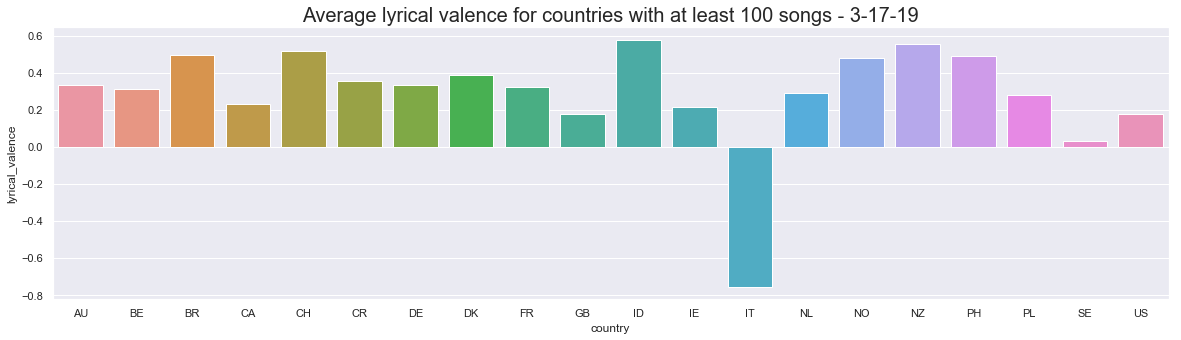

In [461]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x='country', y='lyrical_valence', data=country_sent)
ax.set_title('Average lyrical valence for countries with at least 100 songs - 3-17-19', fontsize=20)
plt.show()
# country_sent

In [389]:
# test = test.to_frame()
country_sent = test.copy()

In [ ]:
# test = test.to_frame()
# country_sent = country_sent[]
country_sent['neg'] = 0
country_sent['neu'] = 0
country_sent['pos'] = 0

pbar = tqdm_notebook(total=len(country_sent))
for index, row in country_sent.iterrows():
    score = analyser.polarity_scores(row['lyrics'])
    country_sent.loc[index, 'neg'] = score['neg']
    country_sent.loc[index, 'neu'] = score['neu']
    country_sent.loc[index, 'pos'] = score['pos']
    pbar.update(1)
pbar.close()

country_sent